# Format Graphs 
Note activate the 'graphing' conda env

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import utils
from cycler import cycler
import scipy

#### Load Mouse Data

In [3]:
pub_mouse = pd.read_csv('/ru-auth/local/home/abrenner/mystore/exp_data/microc/public_microc/pubWTmESC-mapped.pairs-tandem-adj-dist.txt')
pub_mouse = np.array(pub_mouse).flatten()

pub_mouse_subset_idx = np.where(pub_mouse<1000)
pub_mouse_subset_idx
pub_mouse_subset = pub_mouse[pub_mouse_subset_idx]

Formatting Settings

In [4]:
plt.rcdefaults()
# Could use Style Guide Instead of Custom
thickness = 3
fsize = 18
mpl.rcParams['lines.linewidth'] = thickness
mpl.rcParams['lines.linestyle'] = '-'
mpl.rcParams['lines.markersize'] = 10
mpl.rcParams['axes.titlesize'] = fsize
mpl.rcParams['axes.labelsize'] = fsize

mpl.rcParams['xtick.labelsize'] = fsize
mpl.rcParams['ytick.labelsize'] = fsize
#Set Border Width
mpl.rcParams['axes.linewidth'] = 2

#Tick Mark Settings
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = thickness
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = thickness

# Fonts
mpl.rcParams['font.sans-serif'] = 'Helvetica'
# mpl.rcParams['font.weight'] = 'bold'

mpl.rcParams['axes.prop_cycle'] = cycler(color=['#0072B2', '#D55E00', '#009E73', '#CC79A7','#000000','#56B4E9','#E69F00','#F0E442'])

Color blind palette: https://mikemol.github.io/technique/colorblind/2018/02/11/color-safe-palette.html

### Entry Exit Sites Located

In [5]:
cd /ru-auth/local/home/abrenner/mystore/template_wlcsim/wlcsim

/lustre/fs4/risc_lab/store/abrenner/template_wlcsim/wlcsim


In [6]:
import analysis.MCsim_ABC_edits as mc
from mpl_toolkits.mplot3d import Axes3D

In [7]:
mainDir = '/ru-auth/local/home/abrenner/myscratch/sims/2022.03.04_k562_mesc_params/195_nrl_12nucs_1kbt/'
nrl = 195

num_trls = 3
trls = np.arange(1,num_trls + 1)
trials = [str(i)+'_trial/wlcsim/data/' for i in trls]

timePts = 100
eq = 10
data= mc.Simulation(path_to_data=mainDir, trials=trials,time_max=timePts)

read in 1_trial/wlcsim/data/
read in 2_trial/wlcsim/data/
read in 3_trial/wlcsim/data/


In [8]:
eq = 10
# for i in range(2):
for i in range(len(trials)):
    data.trials[trials[i]].setEquilibriumTime(eq)
    for k in range(0,timePts+1): #changed from eq to 0 need to change back
        data.trials[trials[i]].snapshots[k].centerBeads()
        data.trials[trials[i]].snapshots[k].interpolate()

In [9]:
struct = data.trials[trials[0]].snapshots[47]

In [10]:
# nrl = 190
wrap_amount = 127
limit = 450
coords_base = struct.interpolated[:,1,:]
nuc_idxs = struct.nucleosome_indices
nuc_bps = coords_base[nuc_idxs]

in_indices = np.array(nuc_idxs[::wrap_amount]) # New Change 
out_indices = np.array(nuc_idxs[wrap_amount-1::wrap_amount])

# Reshape Indices to permit pairwise distance (pdist) calculation
arr_in = in_indices.reshape(-1,1)
arr_out = out_indices.reshape(-1,1)

# Get 3D coordinates/positions of the base pairs of interest
in_pos_guesses = coords_base[in_indices]
out_pos_guesses = coords_base[out_indices]

### Highlight Full Structure

<IPython.core.display.Javascript object>


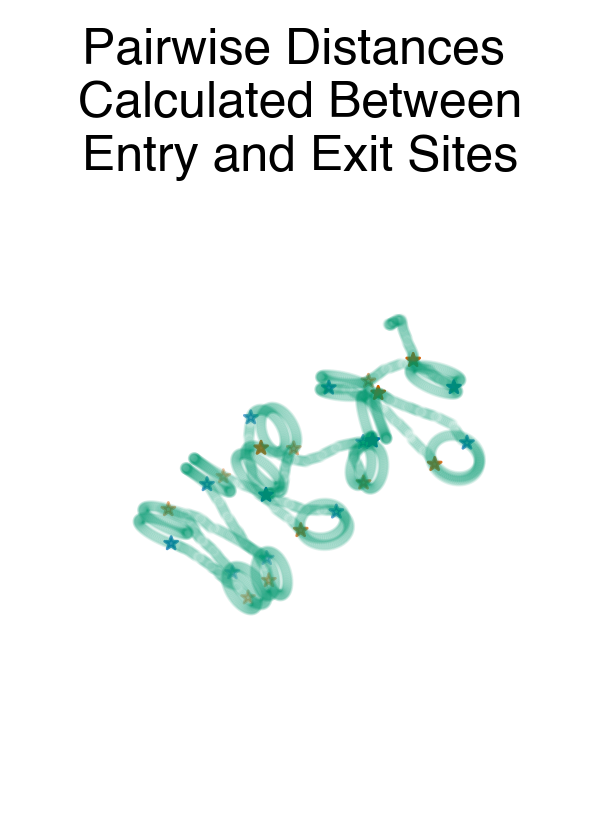

In [11]:
# Look at one nucleosome
%matplotlib notebook 
mpl.rcParams['grid.color'] = 'none'
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['xtick.major.width'] = 0
mpl.rcParams['ytick.major.size'] = 0
mpl.rcParams['ytick.major.width'] = 0
mpl.rcParams['lines.linewidth'] = 0
mpl.rcParams['lines.linestyle'] = '-'
mpl.rcParams['lines.markersize'] = 20
mpl.rcParams['axes.labelsize'] = 0
mpl.rcParams['axes.linewidth'] = 0
fig = plt.figure(figsize=(3,4.2))
ax = fig.add_subplot(projection='3d')
# coords_base = coords_base[:limit]
# in_pos_guesses = in_pos_guesses[:2]
# out_pos_guesses = out_pos_guesses[:2]
ax.scatter(xs = coords_base[:,0], ys = coords_base[:,1], zs = coords_base[:,2], alpha=0.05, color = '#009E73', s = 12, marker = 'o')
ax.scatter(xs = in_pos_guesses[:,0], ys = in_pos_guesses[:,1], zs = in_pos_guesses[:,2], marker = '*', s=24)
ax.scatter(xs = out_pos_guesses[:,0], ys = out_pos_guesses[:,1], zs = out_pos_guesses[:,2], color = '#D55E00', marker = '*', s=24)
plt.axis('off')
plt.title('Pairwise Distances \n Calculated Between \n Entry and Exit Sites ')
plt.tight_layout()
# plt.savefig('/ru-auth/local/home/abrenner/mystore/analysis/micro_c/workflow_figs/entry_exit.pdf', transparent = True)
# plt.savefig('/ru-auth/local/home/abrenner/mystore/analysis/micro_c/workflow_figs/entry_exit.svg', transparent = True)

### Highlight Zoomed in Structure

<IPython.core.display.Javascript object>


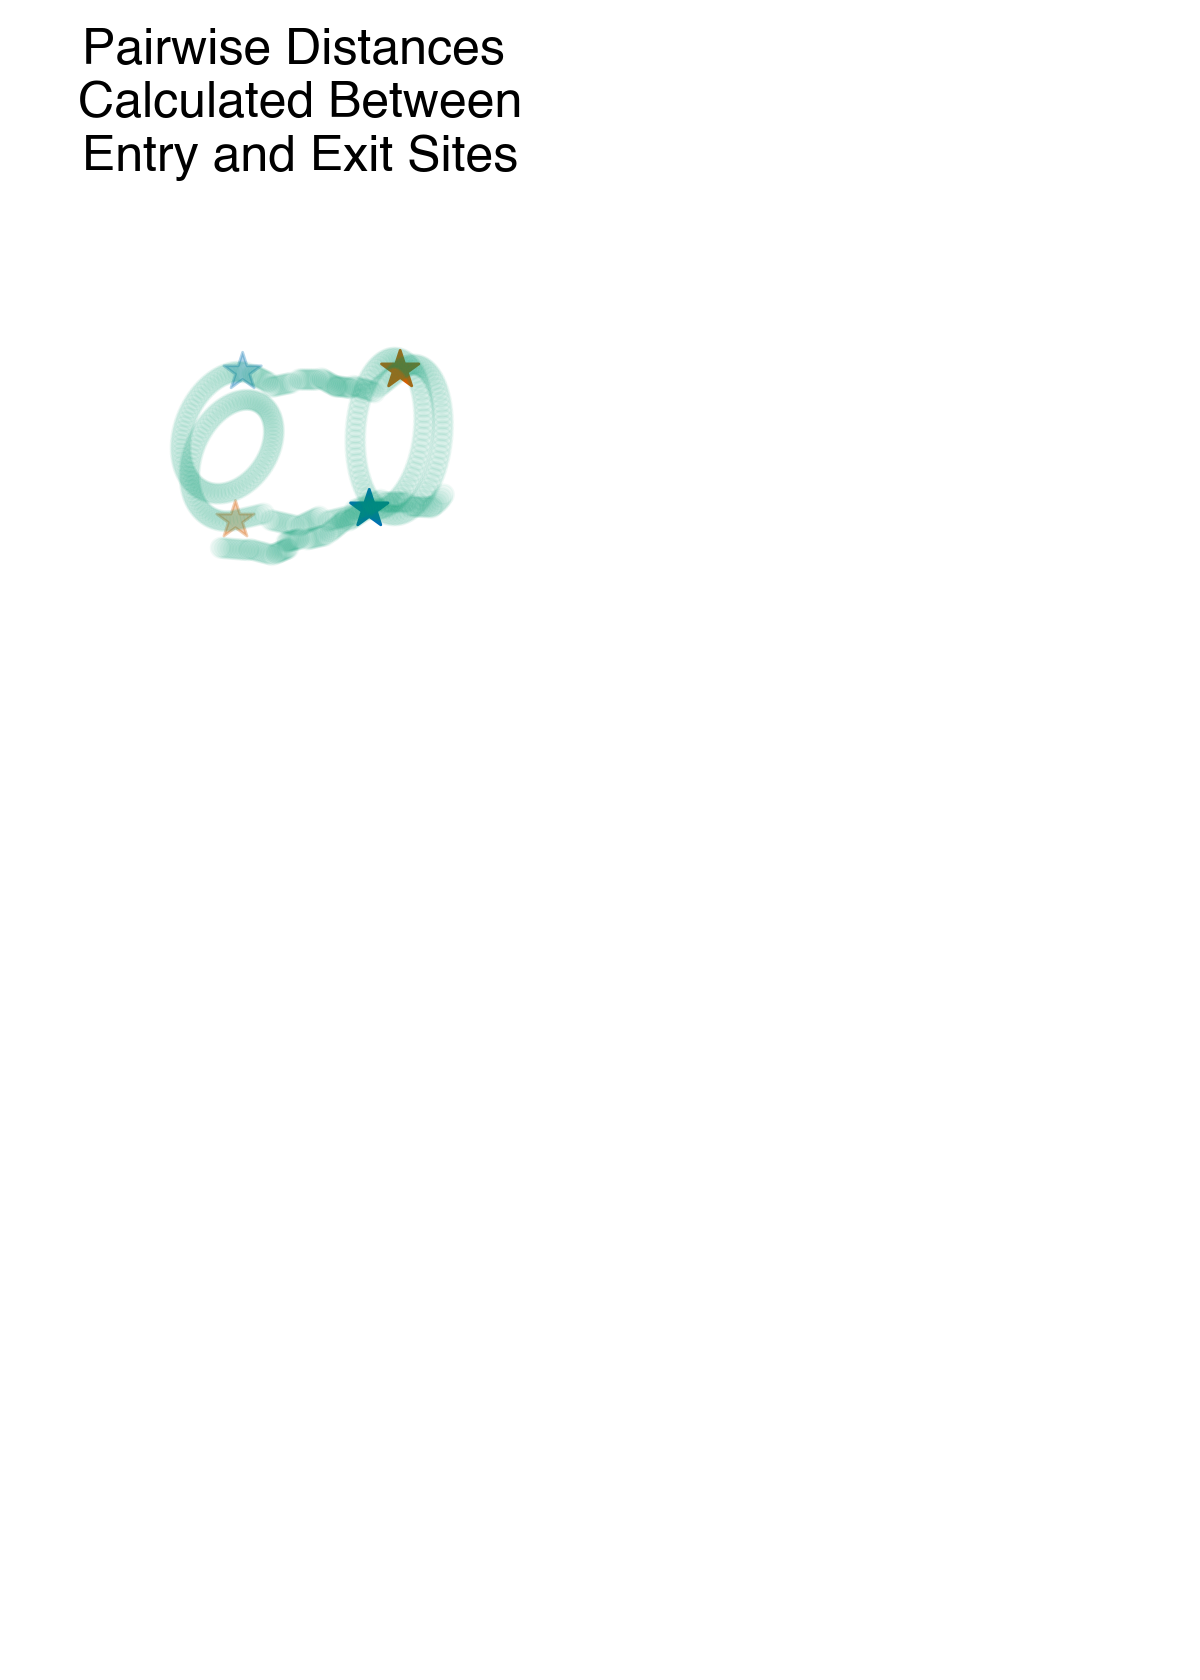

In [12]:
# Look at one nucleosome
%matplotlib notebook 
mpl.rcParams['grid.color'] = 'none'
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['xtick.major.width'] = 0
mpl.rcParams['ytick.major.size'] = 0
mpl.rcParams['ytick.major.width'] = 0
mpl.rcParams['lines.linewidth'] = 0
mpl.rcParams['lines.linestyle'] = '-'
mpl.rcParams['lines.markersize'] = 20
mpl.rcParams['axes.labelsize'] = 0
mpl.rcParams['axes.linewidth'] = 0
fig = plt.figure(figsize=(3,4.2))
ax = fig.add_subplot(projection='3d')
coords_base = coords_base[:limit]
in_pos_guesses = in_pos_guesses[:2]
out_pos_guesses = out_pos_guesses[:2]
ax.scatter(xs = coords_base[:,0], ys = coords_base[:,1], zs = coords_base[:,2], alpha=0.05, color = '#009E73', s = 50, marker = 'o')
ax.scatter(xs = in_pos_guesses[:,0], ys = in_pos_guesses[:,1], zs = in_pos_guesses[:,2], marker = '*', s=200)
ax.scatter(xs = out_pos_guesses[:,0], ys = out_pos_guesses[:,1], zs = out_pos_guesses[:,2], color = '#D55E00', marker = '*', s=200)
plt.axis('off')
plt.title('Pairwise Distances \n Calculated Between \n Entry and Exit Sites ')
plt.tight_layout()
# plt.savefig('/ru-auth/local/home/abrenner/mystore/analysis/micro_c/workflow_figs/entry_exit.pdf', transparent = True)
# plt.savefig('/ru-auth/local/home/abrenner/mystore/analysis/micro_c/workflow_figs/entry_exit.svg', transparent = True)

### Plot Sigmoid Curve

<IPython.core.display.Javascript object>


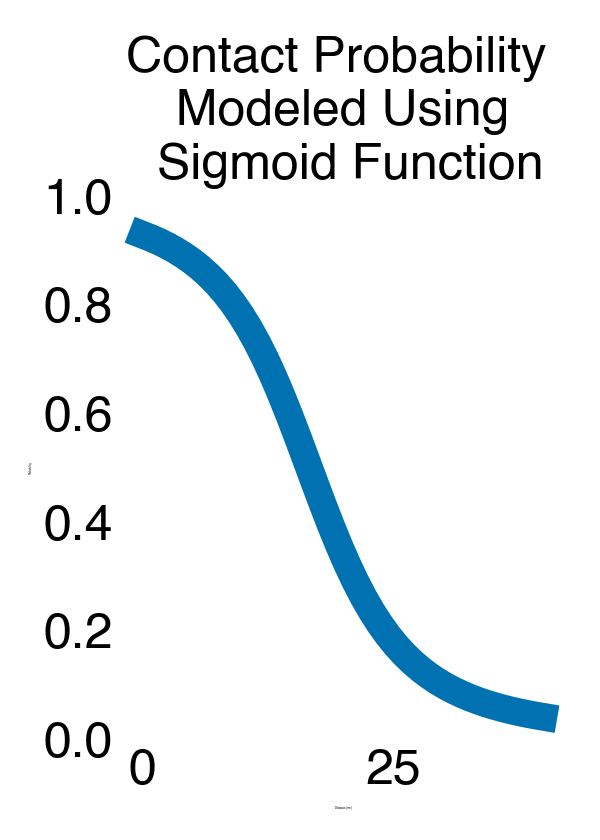

In [13]:
gamma = 0.1
len_scale = 50
d = np.linspace(0,40)
liklihoods = utils.sigmoid(d, gamma = gamma, len_scale = len_scale)
liklihoods

fig, ax = plt.subplots(figsize=(3,4.2))
# ax.hlines(0.5, 0, 40, color = 'r')
# ax.vlines(17, 0, 1, color = 'r')
ax.plot(d, liklihoods, linewidth = 10)
ax.set_ylim((0,1))
plt.xlabel("Distance (nm)")
plt.ylabel("Probability")
plt.title("Contact Probability \n Modeled Using \n Sigmoid Function")
plt.tight_layout()
# plt.savefig('/ru-auth/local/home/abrenner/mystore/analysis/micro_c/workflow_figs/sigmoid.pdf', transparent = True)
# plt.savefig('/ru-auth/local/home/abrenner/mystore/analysis/micro_c/workflow_figs/sigmoid.svg', transparent = True)

<IPython.core.display.Javascript object>


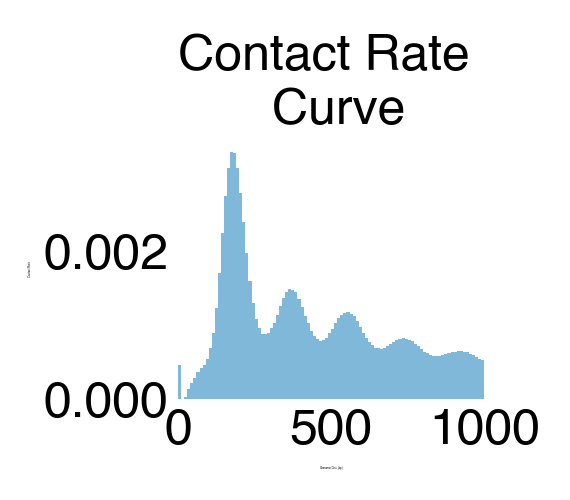

/tmp/ipykernel_71404/761601335.py:8: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  d = scipy.zeros(len(df.Freq_Norm))


In [14]:
fig, ax = plt.subplots(figsize = (2.85,2.5))
plt.title("Contact Rate \n Curve")
df = pd.read_csv('/ru-auth/local/home/abrenner/mystore/analysis/micro_c/simulated_contact_prob_curves/dataframes/175_nrl_12nucs_1kbt_tandem.csv')
# ax.set_ylim((0,0.005))
ax.set_xlim((0,1000))
ax.set_ylim((0,0.0035))
# ax.plot(df.FragmentLengths, df.Freq_Norm) #For lineplot
d = scipy.zeros(len(df.Freq_Norm))
# ax.fill_between(df.FragmentLengths,df.Freq_Norm, where=df.Freq_Norm>=d, alpha = 0.5)
ax.hist(pub_mouse_subset, bins = 100, density = True, alpha = 0.5)
plt.xlabel("Genomic Dist. (bp)")
plt.ylabel("Contact Rate")
plt.tight_layout()
# plt.savefig('/ru-auth/local/home/abrenner/mystore/analysis/micro_c/workflow_figs/contact_prob_curve_example_195_poster.pdf', transparent = True)
# plt.savefig('/ru-auth/local/home/abrenner/mystore/analysis/micro_c/workflow_figs/contact_prob_curve_example_175.svg', transparent = True)

Recreate curve for snap of interest

In [15]:
import random
import utils
from scipy.spatial.distance import pdist, cdist, squareform
max_peaks = 6

In [19]:
random.seed(10)
def one_trial(structure, num_nucs = 12, sd = 40, nrl = 190, wrap_amount = 127, contact_type = 'tandem'):
    '''Make sure interpolation code is run on each structure first
    Contact Type options include: in_in, out_out, and tandem
    '''
    coords_base = structure.interpolated[:,1,:]
    nuc_idxs = structure.nucleosome_indices
    nuc_bps = coords_base[nuc_idxs]
    # Indices (relative to coords_base) of bps of interest
    in_indices = np.array(nuc_idxs[::wrap_amount]) # New Change 
    out_indices = np.array(nuc_idxs[wrap_amount-1::wrap_amount])

    # Reshape Indices to permit pairwise distance (pdist) calculation
    arr_in = in_indices.reshape(-1,1)
    arr_out = out_indices.reshape(-1,1)

    # Get 3D coordinates/positions of the base pairs of interest
    in_pos_guesses = coords_base[in_indices]
    out_pos_guesses = coords_base[out_indices]
    
    #Normalize when there are 12 nucleosomes
    normalization = [num_nucs/(num_nucs - i) for i in np.linspace(1,max_peaks-1,max_peaks-1)]
    
    # Compute pairwise distances
    if contact_type == 'tandem':
        pairwise_dists_in = pdist(in_pos_guesses)
        # Apply sigmoid function to get matrix of contact probabilities, to do: rename dist_mat to prob_mat
        dist_mat_in = squareform([utils.sigmoid(i) for i in pairwise_dists_in])
        # Get matrix of fragment length, computed as distances between indices
        frag_len_mat_in = squareform(pdist(arr_in, 'cityblock'))
        pairwise_dists_out = pdist(out_pos_guesses)
        dist_mat_out = squareform([utils.sigmoid(i) for i in pairwise_dists_out])
        # Get matrix of fragment length, computed as distances between indices
        frag_len_mat_out = squareform(pdist(arr_out, 'cityblock'))
        
        probs_in, fragment_lens_in = flattenProbsAndFrags(dist_mat_in, frag_len_mat_in, normalization)
        probs_out, fragment_lens_out = flattenProbsAndFrags(dist_mat_out, frag_len_mat_out, normalization)
        probs = probs_in + probs_out
        fragment_lens = fragment_lens_in + fragment_lens_out
        
    elif contact_type == 'in_out':
        dist_mat = utils.sigmoid(cdist(in_pos_guesses, out_pos_guesses))
        frag_len_mat = cdist(arr_in, arr_out)
        probs, fragment_lens = flattenProbsAndFrags(dist_mat, frag_len_mat)
    elif contact_type == 'out_int':
        dist_mat = utils.sigmoid(cdist(out_pos_guesses, in_pos_guesses))
        frag_len_mat = cdist(arr_out, arr_in)
        probs, fragment_lens = flattenProbsAndFrags(dist_mat, frag_len_mat)
    else:
        print("CONTACT TYPE NOT VALID")
        return
    
    
    # Add random offset to fragment length drawn from Gaussian Distribution
    digestion_effect = gen_random_int(len(fragment_lens), sd)
    fragment_lens_w_gauss = [fragment_lens[i] + digestion_effect[i] for i in range(len(fragment_lens))]

    return fragment_lens_w_gauss, probs
#     return frag_len_mat, probs
# fragment_lens, probabilities = one_trial(struct, nrl = nrl, contact_type='tandem')

def flattenProbsAndFrags(dist_mat, frag_len_mat, normalization, range_max = max_peaks):
    probs = [list(normalization[i-1]*np.diag(dist_mat,i)) for i in range(1,range_max)]
    
    # Get lists of corresponding fragment lengths
    fragment_lens = [list(np.diag(frag_len_mat,i)) for i in range(1,range_max)]

    # Flatten/reformat list of lists
    probs  = [val for sublist in probs for val in sublist]
    fragment_lens  = [val for sublist in fragment_lens for val in sublist]
    return probs, fragment_lens
#MOVE TO UTILS
def gen_random_int(list_len, sig):
    randoms = [np.round(random.gauss(mu = 0,sigma = sig)) for i in range(0,list_len)]
    return randoms

def multi_trial(nrl, structure, num_nucs = 12, sd = 40, wrap_amount = 127, iterations = 10, contact = 'tandem'):
    f_lens_full = []
    freqs_full = []
    for i in range(0,iterations):
        f_lens, freqs = one_trial(structure = structure, nrl = nrl, contact_type=contact) #ABC
        f_lens_full.append(f_lens)
        freqs_full.append(freqs)
    f_lens_full  = [val for sublist in f_lens_full for val in sublist]
    freqs_full  = [val for sublist in freqs_full for val in sublist]
    return f_lens_full, freqs_full

In [20]:
fragment_lens_w_gauss, probs = multi_trial(nrl=195, structure=struct,iterations=10000)
aggregate_sim = pd.DataFrame(
                {'FragmentLengths': fragment_lens_w_gauss,
                 'Freq': probs
                })
micro_c_grouped = aggregate_sim.groupby(['FragmentLengths'], as_index=False).sum()
micro_c_grouped['Freq_Norm'] = micro_c_grouped.Freq / np.sum(micro_c_grouped.Freq)

In [21]:
len(micro_c_grouped['FragmentLengths'])

1087

In [22]:
counts = np.array(micro_c_grouped.Freq)*1000
frag_lens = np.array(micro_c_grouped.FragmentLengths)
all_frags = [] 
for i in range(0, len(frag_lens)):
        #Sometimes negative fragments can be generated because of gaussian
        #Skip these values
    if frag_lens[i] < 0:
        continue
    temp = np.repeat(frag_lens[i], int(counts[i]))
    all_frags = np.concatenate((all_frags, temp))

KeyboardInterrupt: 

In [ ]:
# Contact Prediction Model Overview

In [ ]:
fig, ax = plt.subplots(figsize = (4.2,4.2))
plt.title("Contact Rate \n Curve")
ax.hist(all_frags, alpha = 0.5, density = True, bins = 50)
plt.xlabel("Genomic Dist. (bp)")
plt.ylabel("Contact Rate")
# plt.legend()
plt.tight_layout()
# plt.savefig('/ru-auth/local/home/abrenner/mystore/analysis/micro_c/workflow_figs/contact_prob_curve_sample_struct_poster.pdf', transparent = True)
plt.show()

In [3]:
# data_path = '/ru-auth/local/home/abrenner/myscratch/microc/'
# h1_low = np.loadtxt(data_path+'K562_low_CKDL210025175-1a-6_HVWV3DSX2_L1-mapped.pairs-tandem-adj-dist.txt', dtype = float)#, comments=’#’, delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding=’bytes’, max_rows=None, *, like= None)
# h1_low_sub = h1_low[h1_low < 1000]
# wt = np.loadtxt(data_path+'K562_WT_CKDL210025175-1a-5_HVWV3DSX2_L1-mapped.pairs-tandem-adj-dist.txt', dtype = float)
# wt_sub = wt[wt<1000]

In [8]:
experiment_list = []
for s in [1,3,8]:
    for j in [12]: #ADD 30 back in once code is ready
        for i in [170,175,180,185,190,195]:
            experiment_list.append(str(i)+"_nrl_"+str(j)+"nucs_"+str(s)+"kbt/")
experiment_list

['170_nrl_12nucs_1kbt/',
 '175_nrl_12nucs_1kbt/',
 '180_nrl_12nucs_1kbt/',
 '185_nrl_12nucs_1kbt/',
 '190_nrl_12nucs_1kbt/',
 '195_nrl_12nucs_1kbt/',
 '170_nrl_12nucs_3kbt/',
 '175_nrl_12nucs_3kbt/',
 '180_nrl_12nucs_3kbt/',
 '185_nrl_12nucs_3kbt/',
 '190_nrl_12nucs_3kbt/',
 '195_nrl_12nucs_3kbt/',
 '170_nrl_12nucs_8kbt/',
 '175_nrl_12nucs_8kbt/',
 '180_nrl_12nucs_8kbt/',
 '185_nrl_12nucs_8kbt/',
 '190_nrl_12nucs_8kbt/',
 '195_nrl_12nucs_8kbt/']

In [442]:
# df = df_170_nrl_12nucs_1kbt = pd.read_csv('/ru-auth/local/home/abrenner/mystore/analysis/micro_c/simulated_contact_prob_curves/dataframes/'+experiment_list[counter][:-1]+'_tandem.csv')

In [51]:
mpl.rcParams['lines.linewidth'] = thickness
mpl.rcParams['lines.linestyle'] = '-'
mpl.rcParams['lines.markersize'] = 10
mpl.rcParams['axes.titlesize'] = fsize
mpl.rcParams['axes.labelsize'] = fsize

mpl.rcParams['xtick.labelsize'] = fsize
mpl.rcParams['ytick.labelsize'] = fsize
#Set Border Width
mpl.rcParams['axes.linewidth'] = 2

#Tick Mark Settings
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = thickness
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = thickness


In [9]:
experiment_list_reordered = []
for s in [8,3,1]:
    for j in [12]: #ADD 30 back in once code is ready
        for i in [170,175,180,185,190,195]:
            experiment_list_reordered.append(str(i)+"_nrl_"+str(j)+"nucs_"+str(s)+"kbt/")
experiment_list_reordered

['170_nrl_12nucs_8kbt/',
 '175_nrl_12nucs_8kbt/',
 '180_nrl_12nucs_8kbt/',
 '185_nrl_12nucs_8kbt/',
 '190_nrl_12nucs_8kbt/',
 '195_nrl_12nucs_8kbt/',
 '170_nrl_12nucs_3kbt/',
 '175_nrl_12nucs_3kbt/',
 '180_nrl_12nucs_3kbt/',
 '185_nrl_12nucs_3kbt/',
 '190_nrl_12nucs_3kbt/',
 '195_nrl_12nucs_3kbt/',
 '170_nrl_12nucs_1kbt/',
 '175_nrl_12nucs_1kbt/',
 '180_nrl_12nucs_1kbt/',
 '185_nrl_12nucs_1kbt/',
 '190_nrl_12nucs_1kbt/',
 '195_nrl_12nucs_1kbt/']

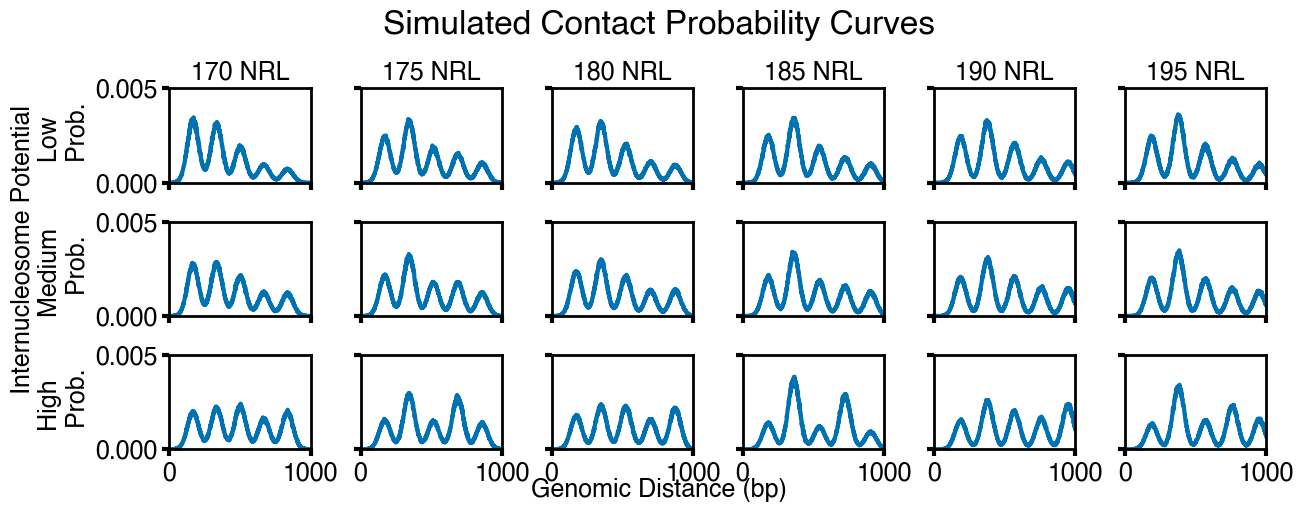

In [9]:
# fig, axs = plt.subplots(3 , 6, constrained_layout=False, figsize = (13,5), sharex=True, sharey=True)
# fig.suptitle("Simulated Contact Probability Curves", size = 24)
# # axs.set_xlabel('Genomic Distance (bp)')
# # plt.ylabel('Probability')
# counter = 0

# cols = ['170 NRL', '175 NRL','180 NRL','185 NRL','190 NRL', '195 NRL']
# rows = ['Low \n Prob.', 'Medium \n Prob.', 'High \n Prob.']
# for ax, col in zip(axs[0], cols):
#     ax.set_title(col, size = 18)

# for ax, row in zip(axs[:,0], rows):
#     ax.set_ylabel(row, rotation=90, size=18)

# for ax in axs.flat:
#     df = pd.read_csv('/ru-auth/local/home/abrenner/mystore/analysis/micro_c/simulated_contact_prob_curves/dataframes/'+experiment_list[counter][:-1]+'_tandem.csv')
#     ax.set_ylim((0,0.005))
#     ax.set_xlim((0,1000))
#     ax.plot(df.FragmentLengths, df.Freq_Norm)#, marker = '.')
# #     ax.hist(wt_sub, bins = 100, density = True, color = 'g', alpha = 0.2)
#     counter = counter + 1
# # plt.set_ylabel('test')
# # Set common labels
# fig.text(0.5, 0.02, 'Genomic Distance (bp)', ha='center', va='center', fontsize = 18)
# fig.text(0.01, 0.5, 'Internucleosome Potential', ha='center', va='center', rotation='vertical', fontsize = 18)
# plt.tight_layout()
# plt.show()
# # plt.savefig('/ru-auth/local/home/abrenner/mystore/analysis/micro_c/simulated_contact_prob_curves/figures/summary_tandem_vs_k562_low_updatefont.pdf', transparent = True)

In [53]:
# fig, axs = plt.subplots(3 , 6, constrained_layout=True, figsize = (11,8.5))
# plt.suptitle("Simulated Contact Prob Curves Compared to K562 WT", size = 24)
# counter = 0

# cols = ['170 NRL', '175 NRL','180 NRL','185 NRL','190 NRL', '195 NRL']
# rows = ['Low', 'Medium', 'High']
# for ax, col in zip(axs[0], cols):
#     ax.set_title(col, size = 18)

# for ax, row in zip(axs[:,0], rows):
#     ax.set_ylabel(row, rotation=90, size=18)

# for ax in axs.flat:
#     df = pd.read_csv('/ru-auth/local/home/abrenner/mystore/analysis/micro_c/simulated_contact_prob_curves/dataframes/'+experiment_list[counter][:-1]+'_tandem.csv')
#     ax.set_ylim((0,0.005))
#     ax.set_xlim((0,1000))
#     ax.plot(df.FragmentLengths, df.Freq_Norm)#, marker = '.')
# #     ax.vlines(np.array([521.68873135,
# #         890.70347939,
# #         169.11572056,
# #         347.89212171,
# #         700.39306878]), 0 , 0.005, alpha = 0.2)
#     ax.hist(wt_sub, bins = 100, density = True, color = 'r', alpha = 0.2)
#     counter = counter + 1
# # plt.savefig('/ru-auth/local/home/abrenner/mystore/analysis/micro_c/simulated_contact_prob_curves/figures/summary_tandem_vs_k562_wt_updatefont.pdf')

### Plot only one Contact Probability Curve

In [5]:
# mpl.rcParams['lines.linewidth'] = thickness*2
# mpl.rcParams['lines.linestyle'] = '-'
# mpl.rcParams['lines.markersize'] = 10
# mpl.rcParams['axes.titlesize'] = fsize
# mpl.rcParams['axes.labelsize'] = fsize

# mpl.rcParams['xtick.labelsize'] = fsize
# mpl.rcParams['ytick.labelsize'] = fsize
# #Set Border Width
# mpl.rcParams['axes.linewidth'] = 2

# #Tick Mark Settings
# mpl.rcParams['xtick.major.size'] = 5
# mpl.rcParams['xtick.major.width'] = thickness
# mpl.rcParams['ytick.major.size'] = 5
# mpl.rcParams['ytick.major.width'] = thickness

### Slide with one experiment vs simulated

In [10]:
# fig, ax = plt.subplots(figsize = (11.5,5))
# plt.title("Experimental Data vs. Simulated 185 NRL Ensemble with Medium Internucleosomal Potential")
# df = pd.read_csv('/ru-auth/local/home/abrenner/mystore/analysis/micro_c/simulated_contact_prob_curves/dataframes/185_nrl_12nucs_3kbt_tandem.csv')
# # ax.set_ylim((0,0.005))
# ax.set_xlim((50,1000))
# # ax.plot(df.FragmentLengths, df.Freq_Norm) #For lineplot
# d = scipy.zeros(len(df.Freq_Norm))
# ax.fill_between(df.FragmentLengths,df.Freq_Norm, where=df.Freq_Norm>=d, alpha = 0.5, label = 'Simulated (185 NRL)')
# # ax.hist(df.FragmentLengths,df.Freq_Norm, alpha = 0.5)
# ax.hist(pub_mouse_subset, bins = 100, density = True, color = 'r', alpha = 0.3, label = 'Experimental (mESC)*')
# legend = ax.legend(loc='upper right', shadow=False, fontsize='x-large')
# plt.xlabel("Genomic Dist. (bp)")
# plt.ylabel("Probability")
# # plt.legend()
# plt.tight_layout()
# plt.savefig('/ru-auth/local/home/abrenner/mystore/analysis/micro_c/workflow_figs/contact_prob_curve_exp_v_sim.pdf', transparent = True)
# plt.show()

### Experimental Only data figure for slides

/tmp/ipykernel_151498/2975380964.py:7: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  d = scipy.zeros(len(df.Freq_Norm))


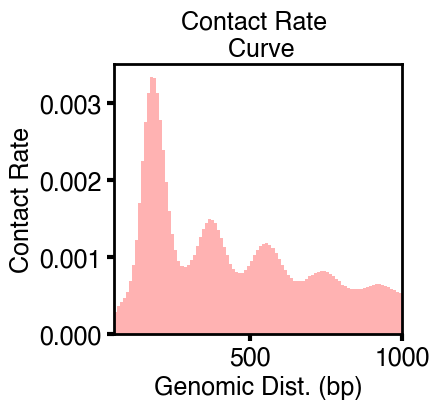

In [24]:
fig, ax = plt.subplots(figsize = (4.5,4.2))
plt.title("Contact Rate \n Curve")
# df = pd.read_csv('/ru-auth/local/home/abrenner/mystore/analysis/micro_c/simulated_contact_prob_curves/dataframes/185_nrl_12nucs_3kbt_tandem.csv')
# ax.set_ylim((0,0.005))
ax.set_xlim((50,1000))
# ax.plot(df.FragmentLengths, df.Freq_Norm) #For lineplot
d = scipy.zeros(len(df.Freq_Norm))
# ax.fill_between(df.FragmentLengths,df.Freq_Norm, where=df.Freq_Norm>=d, alpha = 0.5, label = 'Simulated (185 NRL)')
# ax.hist(df.FragmentLengths,df.Freq_Norm, alpha = 0.5)
ax.hist(pub_mouse_subset, bins = 100, density = True, color = 'r', alpha = 0.3, label = 'Experimental (mESC)*')
# legend = ax.legend(loc='upper right', shadow=False, fontsize='x-large')
plt.xlabel("Genomic Dist. (bp)")
plt.ylabel("Contact Rate")
# plt.legend()
plt.tight_layout()
plt.savefig('/ru-auth/local/home/abrenner/mystore/analysis/micro_c/workflow_figs/contact_prob_curve_exp_only_small.pdf', transparent = True)
plt.show()

### All Exp vs Sims

In [6]:
# exp_means = np.load('/ru-auth/local/home/abrenner/mystore/analysis/micro_c/intermediate_data/mESC_peak_means.npy')
# np.sort(exp_means)

array([179.97947895, 370.9954347 , 549.62761734, 730.65439398,
       907.44681949])

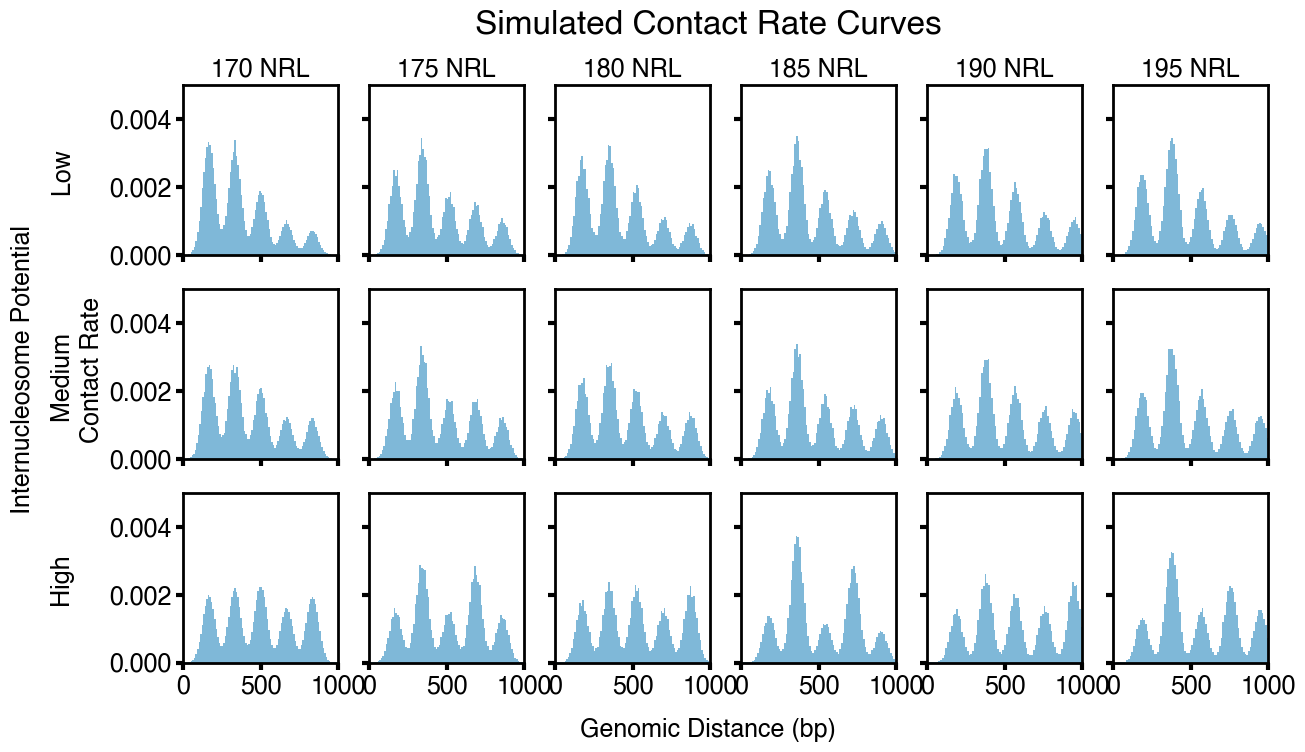

In [12]:
# fig, axs = plt.subplots(3, 6, constrained_layout=False, figsize = (14,7.5), sharex=True, sharey=True)
# fig.suptitle("Simulated Contact Rate Curves", size = 24)
# # axs.set_xlabel('Genomic Distance (bp)')
# # plt.ylabel('Probability')
# counter = 0

# cols = ['170 NRL', '175 NRL','180 NRL','185 NRL','190 NRL', '195 NRL']
# rows = ['Low \n', 'Medium \n Contact Rate', 'High \n']
# for ax, col in zip(axs[0], cols):
#     ax.set_title(col, size = 18)

# for ax, row in zip(axs[:,0], rows):
#     ax.set_ylabel(row, rotation=90, size=18)

# for ax in axs.flat:
# #     if counter >= 1:
# #         continue
#     genomic_dist_loopvar = np.load('/ru-auth/local/home/abrenner/mystore/analysis/micro_c/simulated_contact_prob_curves/dataframes/'+experiment_list[counter][:-1]+'underlying_tandem.npy')
#     upper_y_bound = 0.005
#     ax.set_ylim((0,upper_y_bound))
#     ax.set_xlim((0,1000))
# #     ax.plot(df.FragmentLengths, df.Freq_Norm)#, marker = '.')
# #     d = np.zeros(len(df.Freq_Norm))
# #     ax.fill_between(df.FragmentLengths,df.Freq_Norm, where=df.Freq_Norm>=d, alpha = 0.2, label = 'Simulated (185 NRL)')
#     ax.hist(genomic_dist_loopvar, bins = 100, alpha=0.5, label='Simulated', density = True)
# #     ax.hist(pub_mouse_subset, bins = 100, density = True, color = 'r', alpha = 0.3, label='Experimental')
# #     ax.vlines(exp_means, 0, upper_y_bound, alpha = 0.5, color = 'black', linewidth = 0.5)
#     counter = counter + 1
# # plt.set_ylabel('test')
# # Set common labels
# fig.text(0.5, 0.02, 'Genomic Distance (bp)', ha='center', va='center', fontsize = 18)
# fig.text(0.01, 0.5, 'Internucleosome Potential', ha='center', va='center', rotation='vertical', fontsize = 18)
# lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
# lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# # fig.legend(lines[:2], labels[:2], bbox_to_anchor=(0.9, 0.89), loc='upper left')#, borderaxespad=0)
# # fig.legend(bbox_to_anchor=(0.98, 0.83), loc='upper left')#, borderaxespad=0)
# # legend = ax.legend(loc='upper right', shadow=False, fontsize='x-large')
# # plt.tight_layout()
# plt.savefig('/ru-auth/local/home/abrenner/mystore/analysis/micro_c/simulated_contact_prob_curves/figures/irene_poster_crcs.pdf', transparent = True)
# plt.show()

### Small Experimental Contact Prob Curve

/tmp/ipykernel_151498/1198601070.py:8: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  d = scipy.zeros(len(df.Freq_Norm))


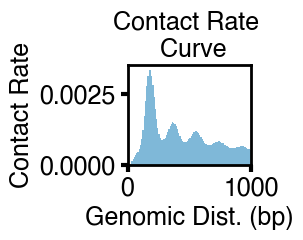

In [21]:
# fig, ax = plt.subplots(figsize = (2.85,2.5))
# plt.title("Contact Rate \n Curve")
# df = pd.read_csv('/ru-auth/local/home/abrenner/mystore/analysis/micro_c/simulated_contact_prob_curves/dataframes/175_nrl_12nucs_1kbt_tandem.csv')
# # ax.set_ylim((0,0.005))
# ax.set_xlim((0,1000))
# ax.set_ylim((0,0.0035))
# # ax.plot(df.FragmentLengths, df.Freq_Norm) #For lineplot
# d = scipy.zeros(len(df.Freq_Norm))
# # ax.fill_between(df.FragmentLengths,df.Freq_Norm, where=df.Freq_Norm>=d, alpha = 0.5)
# ax.hist(pub_mouse_subset, bins = 100, density = True, alpha = 0.5)
# plt.xlabel("Genomic Dist. (bp)")
# plt.ylabel("Contact Rate")
# plt.tight_layout()
# # plt.savefig('/ru-auth/local/home/abrenner/mystore/analysis/micro_c/workflow_figs/contact_prob_curve_example_175_poster.pdf', transparent = True)
# # plt.savefig('/ru-auth/local/home/abrenner/mystore/analysis/micro_c/workflow_figs/contact_prob_curve_example_175.svg', transparent = True)

## Entry-Entry Contact Matrix

In [182]:
# coords_base = struct.interpolated[:,1,:]
# in_indices = np.array(nuc_idxs[::wrap_amount]) # New Change 
# out_indices = np.array(nuc_idxs[wrap_amount-1::wrap_amount])

# # Get 3D coordinates/positions of the base pairs of interest
# in_pos_guesses = coords_base[in_indices]
# out_pos_guesses = coords_base[out_indices]

In [184]:
# from scipy.spatial.distance import pdist, cdist, squareform

In [193]:
# cmaps = {}

# gradient = np.linspace(0, 1, 256)
# gradient = np.vstack((gradient, gradient))


# def plot_color_gradients(category, cmap_list):
#     # Create figure and adjust figure height to number of colormaps
#     nrows = len(cmap_list)
#     figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
#     fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
#     fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
#                         left=0.2, right=0.99)
#     axs[0].set_title(f'{category} colormaps', fontsize=14)

#     for ax, name in zip(axs, cmap_list):
#         ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
#         ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
#                 transform=ax.transAxes)

#     # Turn off *all* ticks & spines, not just the ones with colormaps.
#     for ax in axs:
#         ax.set_axis_off()

#     # Save colormap list for later.
#     cmaps[category] = cmap_list

<IPython.core.display.Javascript object>


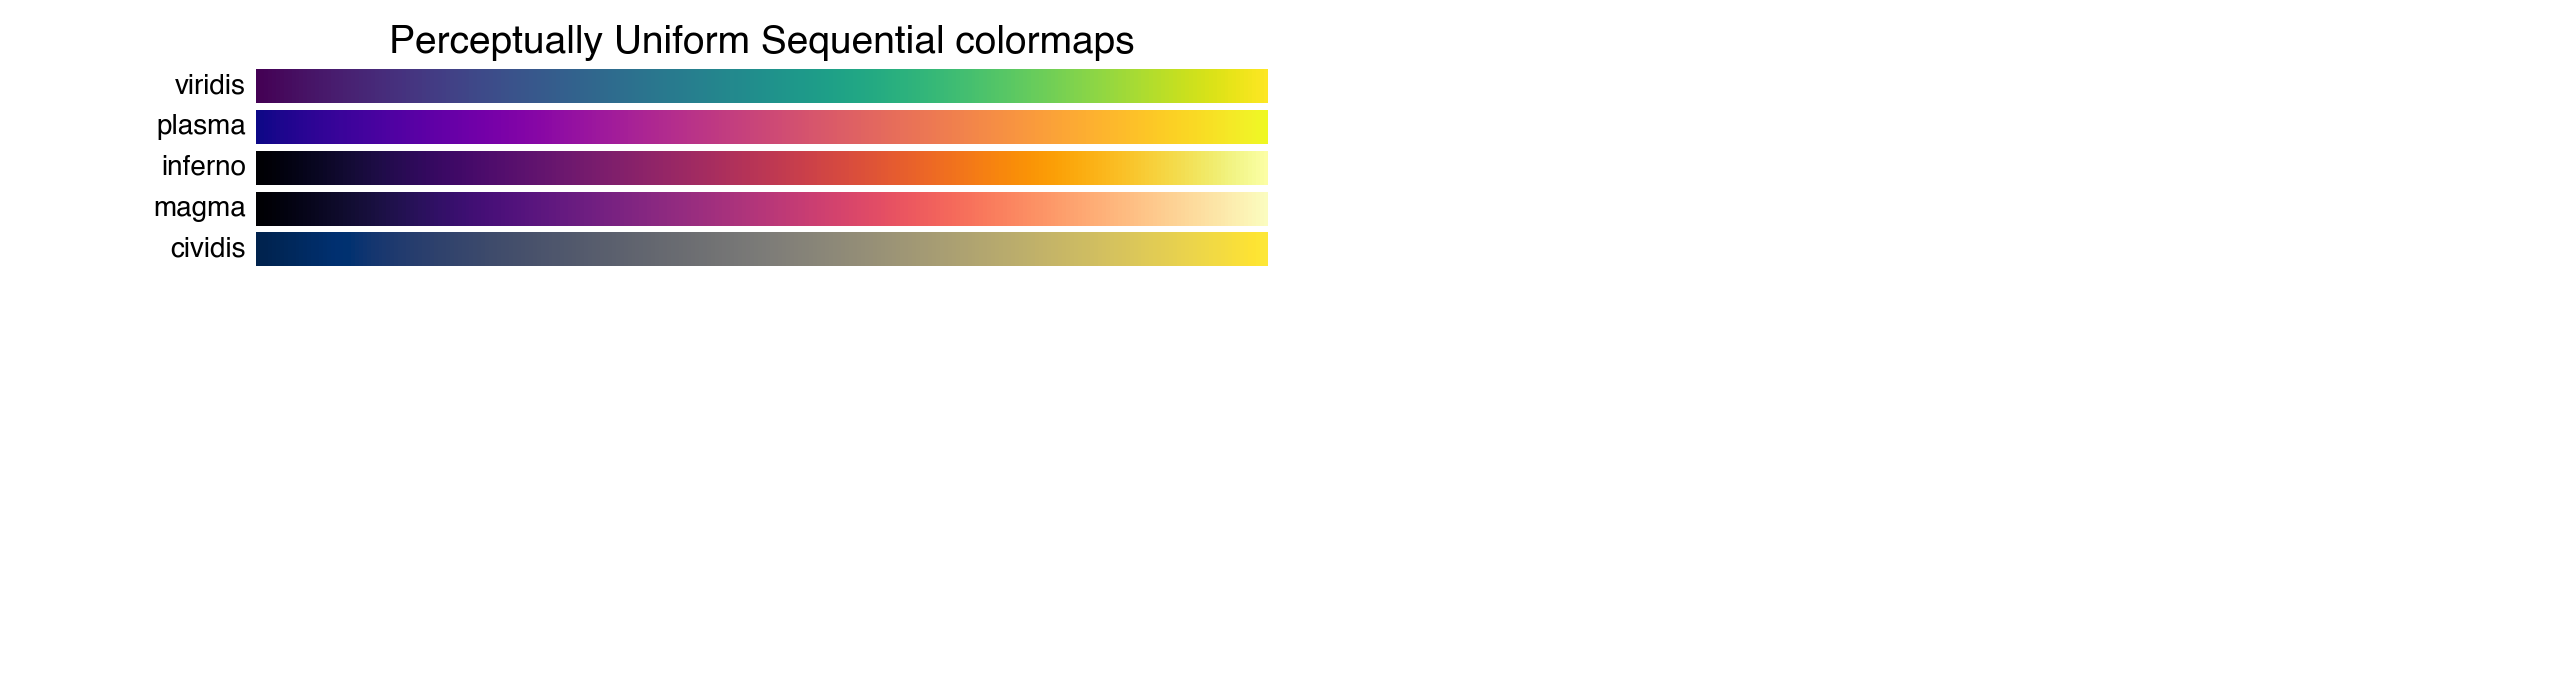

In [194]:
# plot_color_gradients('Perceptually Uniform Sequential',
#                      ['viridis', 'plasma', 'inferno', 'magma', 'cividis'])

In [46]:
# mpl.rcParams['lines.linewidth'] = thickness
# mpl.rcParams['lines.linestyle'] = '-'
# mpl.rcParams['lines.markersize'] = 10
# mpl.rcParams['axes.titlesize'] = fsize
# mpl.rcParams['axes.labelsize'] = fsize

# mpl.rcParams['xtick.labelsize'] = fsize
# mpl.rcParams['ytick.labelsize'] = fsize
# #Set Border Width
# mpl.rcParams['axes.linewidth'] = 2

# #Tick Mark Settings
# mpl.rcParams['xtick.major.size'] = 5
# mpl.rcParams['xtick.major.width'] = thickness
# mpl.rcParams['ytick.major.size'] = 5
# mpl.rcParams['ytick.major.width'] = thickness

<IPython.core.display.Javascript object>


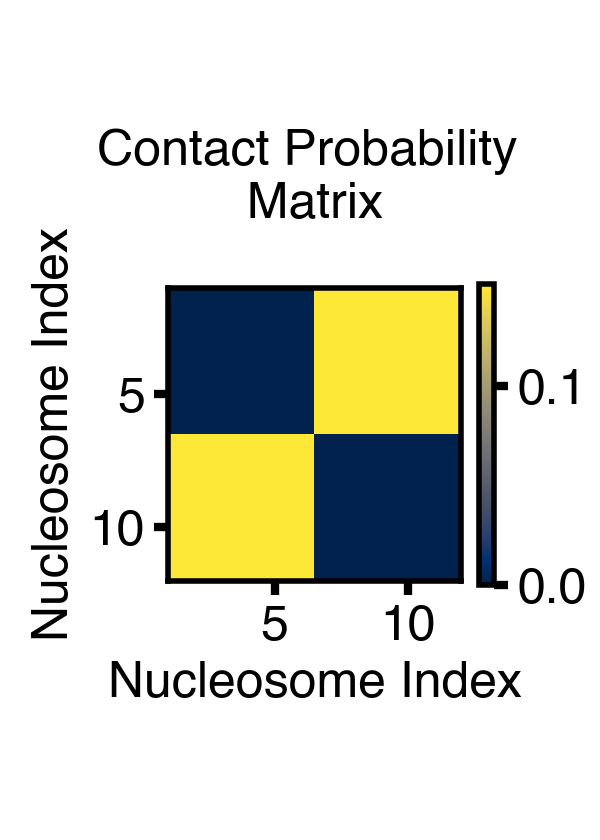

In [47]:
# pairwise_in_in = pdist(in_pos_guesses)
# dist_mat = squareform([utils.sigmoid(i) for i in pairwise_in_in])
# fig, ax = plt.subplots(figsize = (3,4.2))
# plt.title("Contact Probability \n Matrix \n")
# im = plt.imshow(dist_mat, cmap = 'cividis',extent=[1,12,12,1])
# bar = plt.colorbar(im, shrink = 0.4)
# ax.linewidth = 0
# # plt.axis('off')
# plt.xlabel('Nucleosome Index')
# plt.ylabel('Nucleosome Index')
# plt.tight_layout()
# # plt.savefig('/ru-auth/local/home/abrenner/mystore/analysis/micro_c/workflow_figs/contact_prob_mat_example.pdf', transparent = True)
# # plt.savefig('/ru-auth/local/home/abrenner/mystore/analysis/micro_c/workflow_figs/contact_prob_mat_example.svg', transparent = True)
# plt.show()

# Before, I did the multi-trial setup to draw from distribution to simulate digestion. Here I will just use the raw distances to make chart with peak maxima only

Load a snapshot and get its base pair coordinates

Subset these to the entry and exit coodinates

In [192]:
mainDir = '/ru-auth/local/home/abrenner/myscratch/sims/2022.12.15_167_to_197nrl/'
nrl = 187

num_nucs = 12
num_trls = 2#10
trls = np.arange(1,num_trls + 1)
trials = [str(i)+'_trial/wlcsim/data/' for i in trls]
wrap_amount = 127
timePts = 100 # 1000 
eq = 10
data= mc.Simulation(path_to_data=mainDir+str(nrl)+'_nrl_12nucs_8kbt/', trials=trials,time_max=timePts)

read in 1_trial/wlcsim/data/
read in 2_trial/wlcsim/data/


In [193]:
for i in range(len(trials)):
    data.trials[trials[i]].setEquilibriumTime(eq)
    for k in range(0,timePts+1): #changed from eq to 0 need to change back
        data.trials[trials[i]].snapshots[k].centerBeads()
        data.trials[trials[i]].snapshots[k].interpolate()

In [191]:
in_coords = np.zeros((timePts - eq + 1, num_nucs, 3))
out_coords = np.zeros((timePts - eq + 1, num_nucs, 3))

struct = data.trials[trials[0]].snapshots[11]
nuc_idxs = struct.nucleosome_indices
nuc_bps = coords_base[nuc_idxs]
in_indices = np.array(nuc_idxs[::wrap_amount]) # New Change 
out_indices = np.array(nuc_idxs[wrap_amount-1::wrap_amount])

# NEED TO ITERATE OVER TRIALS TOO
# Reshape Indices to permit pairwise distance (pdist) calculation
arr_in = in_indices.reshape(-1,1)
arr_out = out_indices.reshape(-1,1)
for i in range(eq,timePts+1):
    struct = data.trials[trials[0]].snapshots[i]
    wrap_amount = 127
    coords_base = struct.interpolated[:,1,:]

    # Get 3D coordinates/positions of the base pairs of interest
    in_coords[i-eq] = coords_base[in_indices]
    out_coords[i-eq] = coords_base[out_indices]

In [190]:
in_coords

array([[[ 20.18856848, -29.13213003, 124.55137983],
        [  1.53897298, -34.3635365 , 130.90611578],
        [ 17.0345768 , -31.1171643 , 116.11593508],
        ...,
        [ -3.76977002, -35.87180855, 150.55578869],
        [-11.68060377, -31.28666036, 148.57720745],
        [  6.99172336, -24.09494237, 154.00573191]],

       [[ 12.57100602, -24.23666504, 129.41364076],
        [ -2.51411509, -34.67317292, 133.78110626],
        [  7.14214536, -24.36112097, 121.63257937],
        ...,
        [ -1.74330103, -35.22553847, 155.985666  ],
        [ -9.71778419, -29.3858238 , 151.80013885],
        [  8.42504471, -25.32565143, 151.37084498]],

       [[  8.57839396, -22.57120742, 132.52859671],
        [ -4.48920391, -35.21562265, 140.26370698],
        [  0.9415293 , -20.36416334, 128.84701316],
        ...,
        [ -0.76621158, -36.6599046 , 155.53045095],
        [ -8.76838807, -33.76580056, 151.52815329],
        [  8.56453121, -25.74860193, 152.97549994]],

       ...,

      

In [160]:
# Dictionary to store tandem distances for n1, n2, n3, and n4
all_distances = {}

# Compute tandem distances using a loop
for offset in range(0, 12):  # For offsets n1 to n4    
    tandem_ins =  np.concatenate([np.diagonal(squareform(pdist(in_coords[i])), offset=offset) for i in range(0,len(in_coords))])
    tandem_outs =  np.concatenate([np.diagonal(squareform(pdist(out_coords[i])), offset=offset) for i in range(0,len(in_coords))])
    all_distances[f'tandem_n{offset}'] = np.concatenate([tandem_ins, tandem_outs])
    
    all_distances[f'ent_ex_n{offset}'] = np.concatenate([np.diagonal(cdist(in_coords[i], out_coords[i]), offset=offset) for i in range(0,len(in_coords))])
    all_distances[f'ex_ent_n{offset}'] = np.concatenate([np.diagonal(cdist(out_coords[i], in_coords[i]), offset=offset) for i in range(0,len(in_coords))])

In [178]:
# def get_dictionary_of_dists(nrl = 187, internuc = '8'):
#     data= mc.Simulation(path_to_data=mainDir+str(nrl)+'_nrl_12nucs_'+internuc+'kbt/', trials=trials,time_max=timePts)
#     for i in range(len(trials)):
#         data.trials[trials[i]].setEquilibriumTime(eq)
#     for k in range(eq,timePts+1): #changed from eq to 0 need to change back
#         data.trials[trials[i]].snapshots[k].centerBeads()
#         data.trials[trials[i]].snapshots[k].interpolate()
#     in_coords = np.zeros((timePts - eq + 1, num_nucs, 3))
#     out_coords = np.zeros((timePts - eq + 1, num_nucs, 3))
#     for i in range(eq,timePts+1):
#         struct = data.trials[trials[0]].snapshots[i]
#         if struct is None or struct.interpolated is None:
#             print(f"Warning: Missing data at index {i}")
#             continue  # Skip this iteration if data is missing


#         coords_base = struct.interpolated[:,1,:]
#         nuc_idxs = struct.nucleosome_indices
#         nuc_bps = coords_base[nuc_idxs]

#         in_indices = np.array(nuc_idxs[::wrap_amount]) # New Change 
#         out_indices = np.array(nuc_idxs[wrap_amount-1::wrap_amount])

#         # Reshape Indices to permit pairwise distance (pdist) calculation
#         arr_in = in_indices.reshape(-1,1)
#         arr_out = out_indices.reshape(-1,1)

#         # Get 3D coordinates/positions of the base pairs of interest
#         in_coords[i-eq] = coords_base[in_indices]
#         out_coords[i-eq] = coords_base[out_indices]
#         # Dictionary to store tandem distances for n1, n2, n3, and n4
#     all_distances = {}

#     # Compute tandem distances using a loop
#     for offset in range(0, 12):  # For offsets n1 to n4    
#         tandem_ins =  np.concatenate([np.diagonal(squareform(pdist(in_coords[i])), offset=offset) for i in range(0,len(in_coords))])
#         tandem_outs =  np.concatenate([np.diagonal(squareform(pdist(out_coords[i])), offset=offset) for i in range(0,len(in_coords))])
#         all_distances[f'tandem_n{offset}'] = np.concatenate([tandem_ins, tandem_outs])

#         all_distances[f'ent_ex_n{offset}'] = np.concatenate([np.diagonal(cdist(in_coords[i], out_coords[i]), offset=offset) for i in range(0,len(in_coords))])
#         all_distances[f'ex_ent_n{offset}'] = np.concatenate([np.diagonal(cdist(out_coords[i], in_coords[i]), offset=offset) for i in range(0,len(in_coords))])
#     return all_distances

In [179]:
# dist_dict = get_dictionary_of_dists(nrl = 187, internuc = '8')

read in 1_trial/wlcsim/data/
read in 2_trial/wlcsim/data/


In [162]:
tandem_means = []
tandem_stds = []
ext_entry_dists = []
ext_entry_stds = []
entry_ext_dists = []
entry_ext_stds = []
for i in range(0, 12):
    tandem_means.append(np.mean(all_distances['tandem_n'+str(i)]))
    tandem_stds.append(np.std(all_distances['tandem_n'+str(i)]))
    entry_ext_dists.append(np.mean(all_distances['ent_ex_n'+str(i)]))
    entry_ext_stds.append(np.std(all_distances['ent_ex_n'+str(i)]))
    ext_entry_dists.append(np.mean(all_distances['ex_ent_n'+str(i)]))
    ext_entry_stds.append(np.std(all_distances['ex_ent_n'+str(i)]))
# tandem_means = np.array(tandem_means)
# entry_ext_dists = np.array(entry_ext_dists)

In [163]:
import utility

<IPython.core.display.Javascript object>


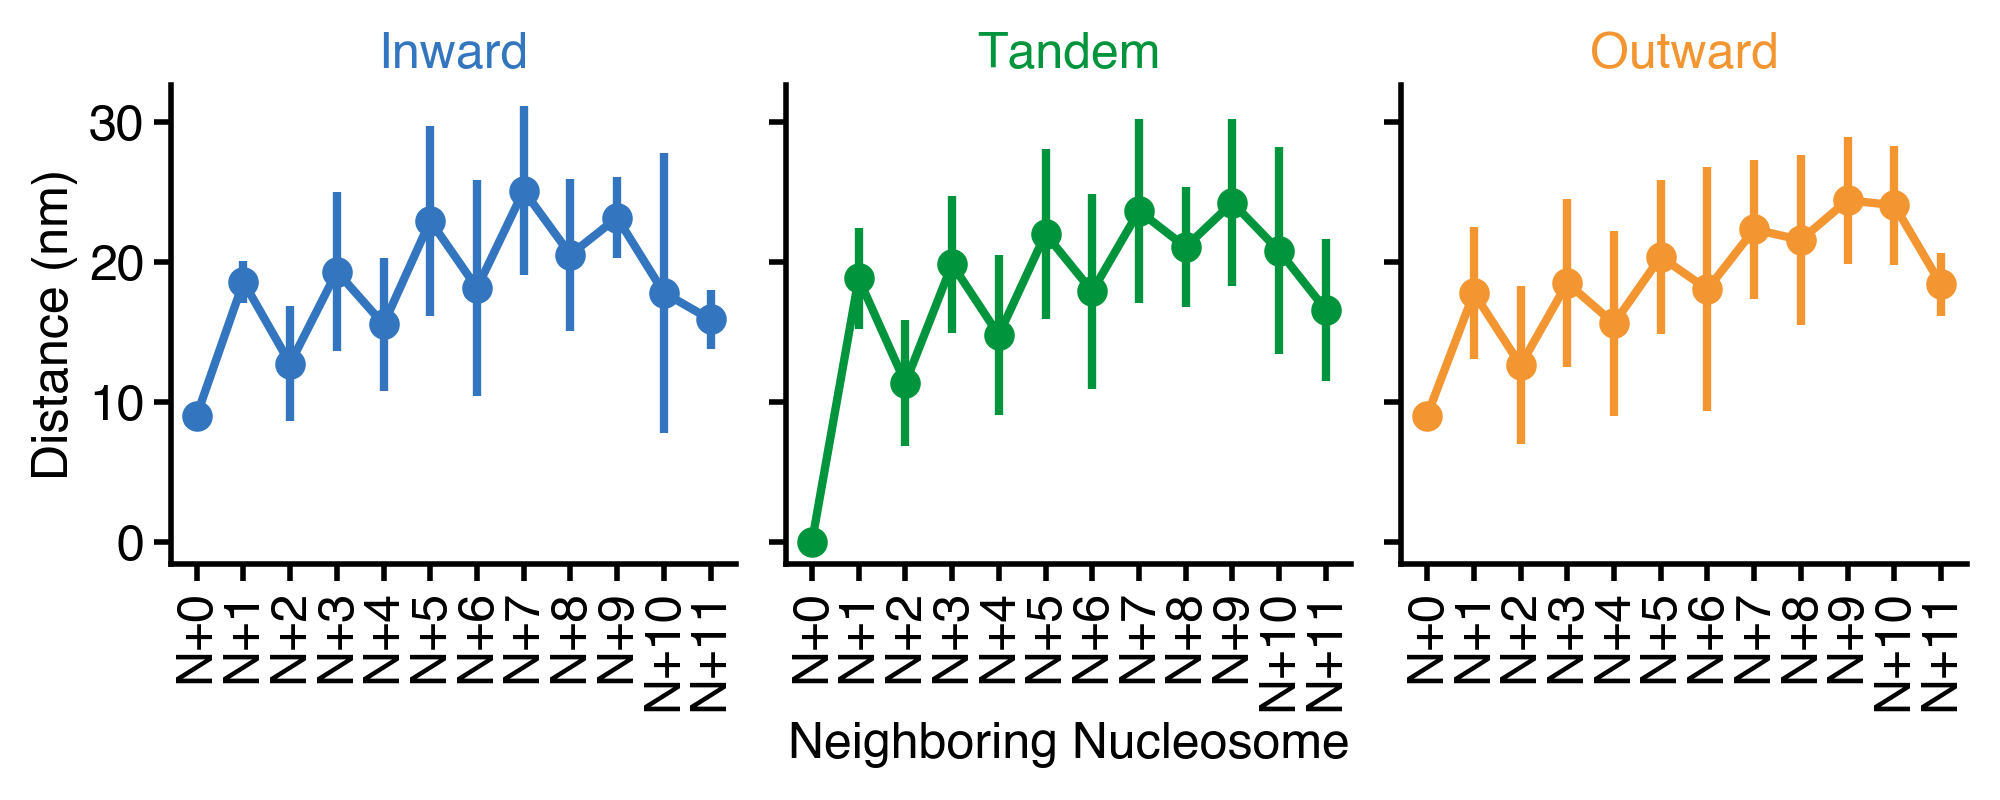

/tmp/ipykernel_71404/1395639226.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  [ax[i].set_xticklabels(labels, rotation=90) for i in range(0,3)]


In [164]:
fig, ax = plt.subplots(1, 3, figsize=(10,4), sharey = True)

labels = ['N+0','N+1','N+2','N+3','N+4','N+5','N+6','N+7', 'N+8', 'N+9', 'N+10', 'N+11']
ax[0].errorbar(labels, ext_entry_dists,yerr= ext_entry_stds, marker = 'o', color = '#3376BF')
ax[0].set_title('Inward', color = '#3376BF')
[ax[i].set_xticklabels(labels, rotation=90) for i in range(0,3)]



ax[1].errorbar(labels, tandem_means,yerr = tandem_stds, marker = 'o', color = '#00953C')
ax[1].set_title('Tandem' , color = '#00953C')
 
ax[2].errorbar(labels, entry_ext_dists, yerr= entry_ext_stds, marker = 'o', color = '#F39632')
ax[2].set_title('Outward', color = '#F39632')

[ax[i].spines['right'].set_visible(False) for i in range(0,3)]
[ax[i].spines['top'].set_visible(False) for i in range(0,3)]

ax[0].set_ylabel('Distance (nm)')
ax[1].set_xlabel('Neighboring Nucleosome')
plt.tight_layout()
# plt.savefig(plots_dir + 'micro_c/song_dists.pdf')a
plt.show()